In [17]:
import sys
import os

import numpy as np
import pandas as pd
import torch
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
importances_df = pd.read_csv("../output/bestboost-importances-347.csv", index_col=0, header=0)

In [3]:
importances_df

,ENSG00000242485,ENSG00000160075,ENSG00000120948,ENSG00000116670,ENSG00000116688,ENSG00000065526,ENSG00000037637,ENSG00000004487,ENSG00000188529,ENSG00000117751,...,ENSG00000182220,ENSG00000124486,ENSG00000182872,ENSG00000072506,ENSG00000102144,ENSG00000101972,ENSG00000071553,ENSG00000071859,target,intervention
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.354050,0.000000,0.000000,0.000000,0.000002,0.0,0.000000,ENSG00000242485,ENSG00000004487
1,NaN,0.000000,0.000000,0.000000,0.000000,0.207394,0.0,0.000000,0.422177,0.000000,...,0.000000,0.000132,0.000000,0.000000,0.185274,0.520394,0.0,0.059973,ENSG00000242485,ENSG00000006715
2,NaN,0.038413,0.066914,0.000000,0.000000,0.051818,0.0,0.000000,0.617844,0.244279,...,0.000000,0.054459,0.000000,0.167380,0.005391,0.000000,0.0,1.844350,ENSG00000242485,ENSG00000010292
3,NaN,1.686746,0.002971,0.000000,0.000000,0.000000,0.0,0.000000,0.002399,0.000000,...,0.000000,0.060766,0.000000,1.263566,0.285336,0.000000,0.0,0.756259,ENSG00000242485,ENSG00000010810
4,NaN,0.000000,0.023256,0.000000,0.000000,0.081766,0.0,0.000000,0.078511,0.086849,...,0.000000,0.000000,0.000000,0.000000,0.167967,0.000000,0.0,0.000000,ENSG00000242485,ENSG00000012174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0.000000,1.211544,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.633606,0.000000,0.0,NaN,ENSG00000071859,ENSG00000276234
419,0.006033,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,ENSG00000071859,ENSG00000284024
420,0.000000,0.000000,0.000000,0.000000,0.528265,0.000000,0.0,0.110924,0.084374,0.000000,...,0.000153,0.000000,0.000000,0.000000,0.124726,0.000000,0.0,NaN,ENSG00000071859,ENSG00000285053
421,0.256588,0.545135,0.000000,0.502751,0.000000,0.454777,0.0,0.031824,0.000000,0.098884,...,0.518170,0.000000,0.099854,0.000000,1.542779,0.156536,0.0,NaN,ENSG00000071859,excluded


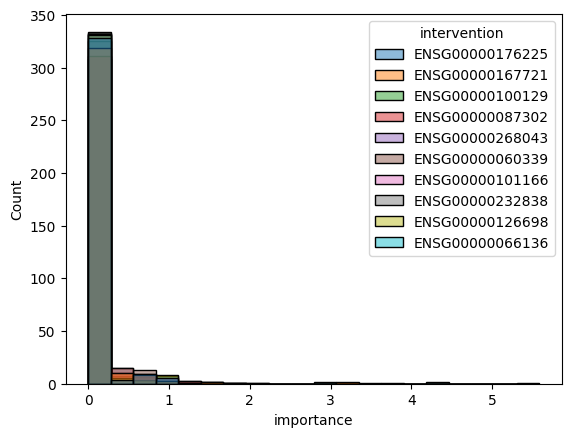

In [4]:
for target in importances_df["target"].unique():
    target_df = importances_df[importances_df["target"] == target]
#     print(target_df.values[:, :-2].mean(axis=0))

    # select a random sample of interventions
    sampled_df = target_df.sample(n=10)
    # plot histogram of importances starting by pivoting all but the last two columns
    melted_target_df = sampled_df.melt(id_vars=["intervention"], value_vars=target_df.columns[:-2], var_name="candidate_gene_name", value_name="importance")
    
    
    sns.histplot(data=melted_target_df, x="importance", hue="intervention", bins=20)
    break

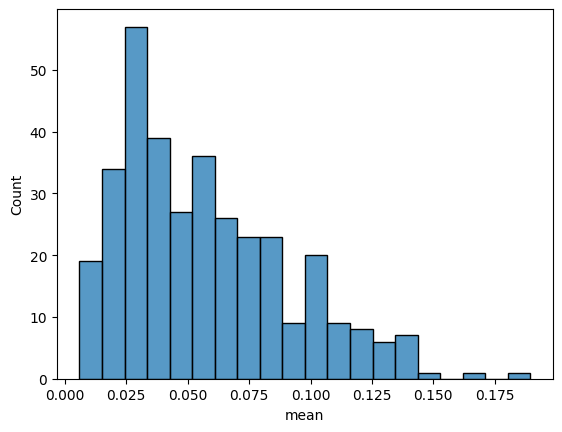

In [5]:
for target in importances_df["target"].unique():
    target_df = importances_df[importances_df["target"] == target]
    mean_df = pd.DataFrame(target_df.values[:, :-2].mean(axis=0).T, columns=["mean"])
    sns.histplot(data=mean_df, x="mean", bins=20)
    break

In [6]:
# check alignment with GRNboost importances
grn_df = pd.read_csv("../output/grn-288.csv", index_col=0, header=0)
grn_df

,TF,target,importance
161,ENSG00000123416,ENSG00000196230,1.811285e+02
110,ENSG00000147604,ENSG00000125691,1.752293e+02
64,ENSG00000164032,ENSG00000123416,1.732390e+02
161,ENSG00000123416,ENSG00000164032,1.662275e+02
221,ENSG00000125691,ENSG00000147604,1.660546e+02
...,...,...,...
107,ENSG00000013374,ENSG00000119718,4.816042e-08
154,ENSG00000111642,ENSG00000188986,4.712617e-08
138,ENSG00000110321,ENSG00000156603,4.207034e-08
47,ENSG00000132153,ENSG00000110713,2.777287e-09


In [37]:
edge_importance_dfs = []
for target in importances_df["target"].unique():
    target_df = importances_df[importances_df["target"] == target]
    mean_df = pd.DataFrame(np.mean(target_df.values[:, :-2], axis=0).T, columns=["bestboost_importance"])
    mean_df["TF"] = target_df.columns[:-2]
    mean_df["target"] = target
    edge_importance_dfs.append(mean_df)
edge_importance_df = pd.concat(edge_importance_dfs, axis=0)

In [38]:
edge_importance_df


,bestboost_importance,TF,target
0,NaN,ENSG00000242485,ENSG00000242485
1,0.102634,ENSG00000160075,ENSG00000242485
2,0.087364,ENSG00000120948,ENSG00000242485
3,0.056752,ENSG00000116670,ENSG00000242485
4,0.02083,ENSG00000116688,ENSG00000242485
...,...,...,...
342,0.060305,ENSG00000072506,ENSG00000071859
343,0.088181,ENSG00000102144,ENSG00000071859
344,0.053528,ENSG00000101972,ENSG00000071859
345,0.049045,ENSG00000071553,ENSG00000071859


In [39]:
# get intersection of these two dataframes
intersection_df = pd.merge(edge_importance_df, grn_df, how="inner", on=["TF", "target"])
intersection_df

,bestboost_importance,TF,target,importance
0,0.102634,ENSG00000160075,ENSG00000242485,10.969079
1,0.087364,ENSG00000120948,ENSG00000242485,0.317107
2,0.056752,ENSG00000116670,ENSG00000242485,2.231089
3,0.055768,ENSG00000065526,ENSG00000242485,0.180856
4,0.098362,ENSG00000188529,ENSG00000242485,0.321808
...,...,...,...,...
69471,0.062063,ENSG00000124486,ENSG00000071859,0.211926
69472,0.02522,ENSG00000182872,ENSG00000071859,0.111274
69473,0.088181,ENSG00000102144,ENSG00000071859,5.342610
69474,0.053528,ENSG00000101972,ENSG00000071859,0.549664


<Axes: xlabel='importance', ylabel='bestboost_importance'>

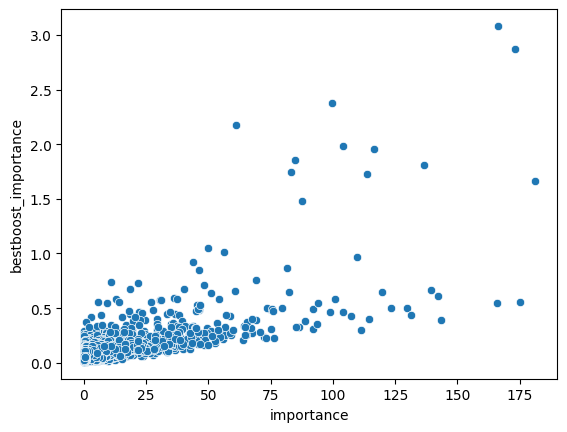

In [40]:
sns.scatterplot(intersection_df, x="importance", y="bestboost_importance")

In [42]:
scipy.stats.pearsonr(x=intersection_df.importance, y=intersection_df.bestboost_importance)

PearsonRResult(statistic=0.6113717589225136, pvalue=0.0)

In [22]:
# compare with betterboost
bb_df = pd.read_csv("../output/betterboost-347.csv", index_col=0, header=0)
bb_df

,TF,target,importance,pvalue,pvalue_rank
122,ENSG00000106263,ENSG00000133112,0.467041,1.478293e-20,5.615580e-07
53,ENSG00000152253,ENSG00000187514,2.748861,1.168272e-19,1.123116e-06
53,ENSG00000152253,ENSG00000123416,7.721556,3.540368e-18,1.684674e-06
163,ENSG00000165644,ENSG00000135486,0.035315,2.428436e-17,2.246232e-06
324,ENSG00000124207,ENSG00000123416,3.074532,3.835268e-17,2.807790e-06
...,...,...,...,...,...
92,ENSG00000146007,ENSG00000130816,0.075070,4.238507e-04,4.290303e-04
113,ENSG00000112249,ENSG00000013374,2.039173,4.277774e-04,4.295919e-04
88,ENSG00000164902,ENSG00000123416,0.069264,4.299440e-04,4.301534e-04
36,ENSG00000069248,ENSG00000196230,0.019232,4.299440e-04,4.307150e-04


In [23]:
bb_intersection_df = pd.merge(edge_importance_df, bb_df, how="inner", on=["TF", "target"])
bb_intersection_df

,mean_bestboost_importance,TF,target,importance,pvalue,pvalue_rank
0,0.055465,ENSG00000064102,ENSG00000242485,0.078751,2.596123e-04,0.000371
1,0.040694,ENSG00000111581,ENSG00000242485,0.278308,2.258555e-04,0.000358
2,0.026518,ENSG00000119718,ENSG00000242485,0.166881,1.692153e-04,0.000328
3,0.056943,ENSG00000124207,ENSG00000242485,2.125928,4.163443e-07,0.000088
4,0.067733,ENSG00000120948,ENSG00000188529,0.442474,2.073828e-04,0.000348
...,...,...,...,...,...,...
763,0.026272,ENSG00000119414,ENSG00000102144,0.328125,2.766732e-09,0.000033
764,0.068343,ENSG00000108064,ENSG00000102144,7.400214,2.804470e-04,0.000384
765,0.104533,ENSG00000103363,ENSG00000102144,0.633597,3.051004e-14,0.000006
766,0.0712,ENSG00000110700,ENSG00000071553,3.707291,5.887133e-07,0.000098


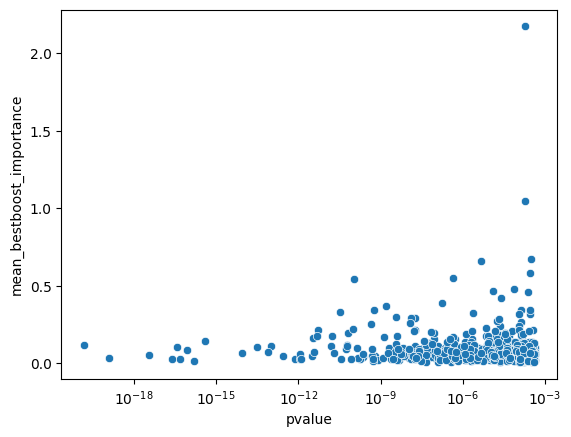

In [27]:
sns.scatterplot(bb_intersection_df, x="pvalue", y="bestboost_importance") 
plt.xscale('log')

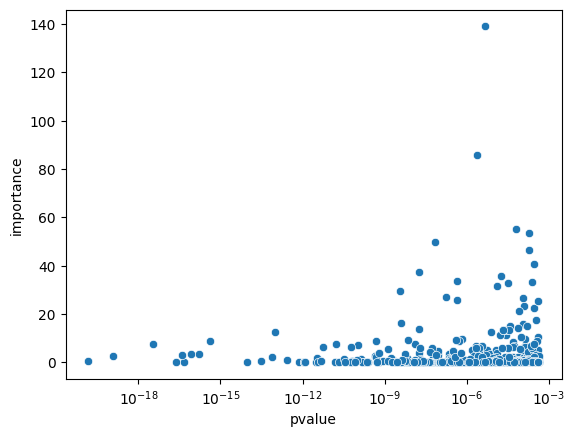

In [28]:
sns.scatterplot(bb_intersection_df, x="pvalue", y="importance") 
plt.xscale('log')